In [1]:
from calendar_ipynb.google_oauth import verify_credentials
from calendar_ipynb.events import fetch_events, filter_out_future_events, sort_events
from calendar_ipynb.ipywidgets.calendar_selection import (
    select_calendars,
    get_selected_calendars,
)
from calendar_ipynb.ipywidgets.date_range_selection import get_selected_date_range
from calendar_ipynb.meta import classify_events

%matplotlib widget
%load_ext autoreload
# Automatically reload all modules
%autoreload 2

EMAIL_IDS = ["fahimalizain@gmail.com", "fahim.zain@kwalee.com"]

for email in EMAIL_IDS:
    verify_credentials(email)

Logging Setup!


INFO:calendar_ipynb.google_oauth:✅ Credentials found for fahimalizain@gmail.com
INFO:calendar_ipynb.google_oauth:✅ Credentials found for fahim.zain@kwalee.com


In [2]:
select_calendars(EMAIL_IDS)
selected_calendars = get_selected_calendars()
if not selected_calendars:
    raise ValueError("No calendars selected")

INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0


In [3]:
from_date, to_date = get_selected_date_range()
if not from_date or not to_date:
    raise ValueError("Please provide from_date and to_date")

print("Date Range:", from_date, " TO ", to_date)

Date Range: 2025-02-08 00:00:00  TO  2025-02-22 23:59:59


In [4]:
events = []
for email, calendars in get_selected_calendars().items():
    for calendar in calendars:
        events.extend(
            fetch_events(
                email=email,
                calendar_id=calendar,
                from_datetime=from_date,
                to_datetime=to_date,
            )
        )
events = filter_out_future_events(events)
events = sort_events(events)
events = classify_events(events)        

INFO:calendar_ipynb.events:Fetching events from 2025-02-08 00:00:00 to 2025-02-22 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-08 00:00:00 to 2025-02-22 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-08 00:00:00 to 2025-02-22 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-08 00:00:00 to 2025-02-22 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-08 00:00:00 to 2025-02-22 23:59:59 for fahim.zain@kwalee.com
INFO:googleapiclient.discovery_cache:file_cache is 

No. of Events before: 424
No. of Events after: 414


In [5]:
events[-1]

{'kind': 'calendar#event',
 'etag': '"3480392944035230"',
 'id': '5222861edfc04613b19630d91e381c1b',
 'status': 'confirmed',
 'htmlLink': 'https://www.google.com/calendar/event?eid=NTIyMjg2MWVkZmMwNDYxM2IxOTYzMGQ5MWUzODFjMWIgajlkNTg4NXJhZWRsb3A5YXBuajVjNG9kb29AZw',
 'created': '2025-02-22T03:54:18.000Z',
 'updated': '2025-02-22T03:54:32.017Z',
 'summary': 'Support for Dynamic Dates | calendar-ipynb',
 'colorId': '11',
 'creator': {'email': 'fahimalizain@gmail.com'},
 'organizer': {'email': 'j9d5885raedlop9apnj5c4odoo@group.calendar.google.com',
  'displayName': 'Work',
  'self': True},
 'start': {'dateTime': '2025-02-22T09:30:00+05:30',
  'timeZone': 'Asia/Kolkata'},
 'end': {'dateTime': '2025-02-22T09:45:00+05:30', 'timeZone': 'Asia/Kolkata'},
 'iCalUID': '5222861edfc04613b19630d91e381c1b@google.com',
 'sequence': 4,
 'guestsCanModify': True,
 'reminders': {'useDefault': True},
 'eventType': 'default',
 'calendar_id': 'j9d5885raedlop9apnj5c4odoo@group.calendar.google.com',
 'email': '

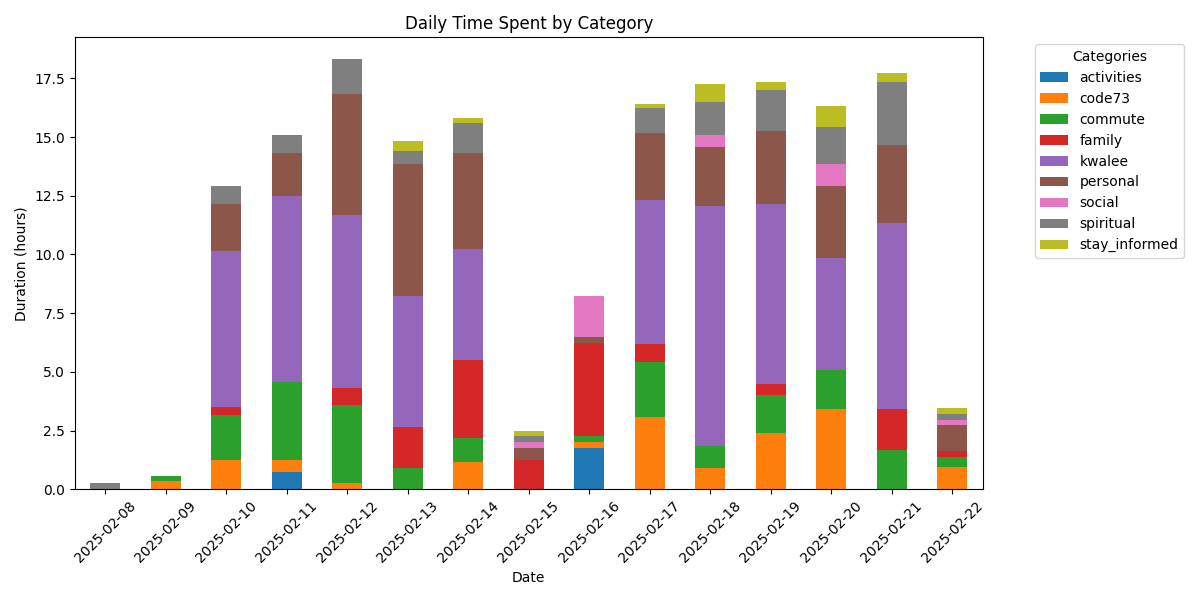

In [6]:
from calendar_ipynb.ipywidgets.bargraph_grouped_by_day import show_bargraph

show_bargraph(events)

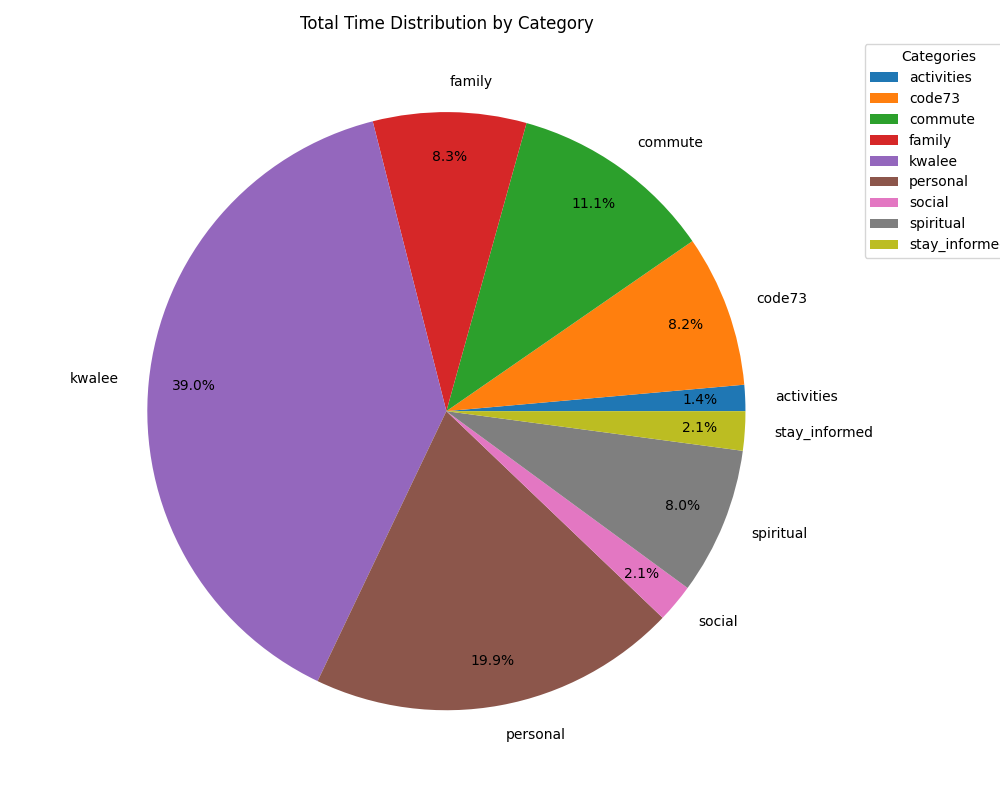

/home/fahimalizain/projects/calendar-ipynb/.venv/lib/python3.10/site-packages/mplcursors/_pick_info.py:142: UserWarning: Pick support for Wedge is missing.
  warnings.warn(f"Pick support for {type(artist).__name__} is missing.")


In [7]:
from calendar_ipynb.ipywidgets.piechart import show_piechart

show_piechart(events)